## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the data set

In [2]:
customers = pd.read_csv("Ecommerce Customers")

In [3]:
# to return top 5 rows of Ecommerce Customers dataset
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
# to see the information of the dataset
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
# to see the statistical information of the dataset
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratoty Data Analysis
We are focussing on Numerical Data in a csv file

Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.

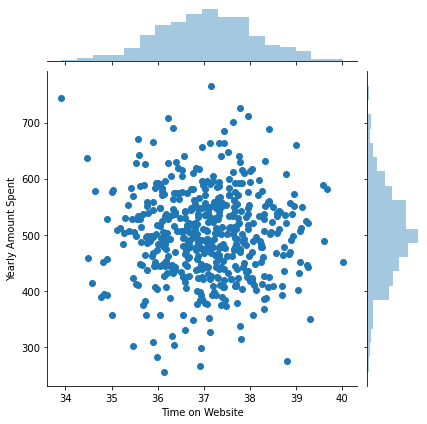

In [6]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

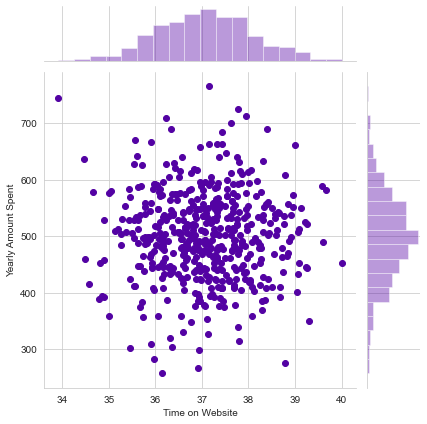

In [10]:
# changing the color and style
sns.set_palette("plasma")
sns.set_style('whitegrid')
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

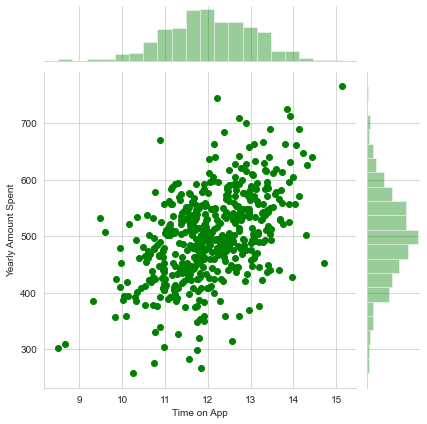

In [15]:
#creating a jointplot to compare the Time on App and Yearly Amount Spent columns
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers,color="g")

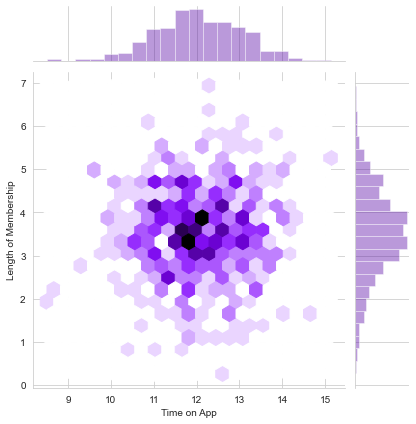

In [16]:
# Using jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

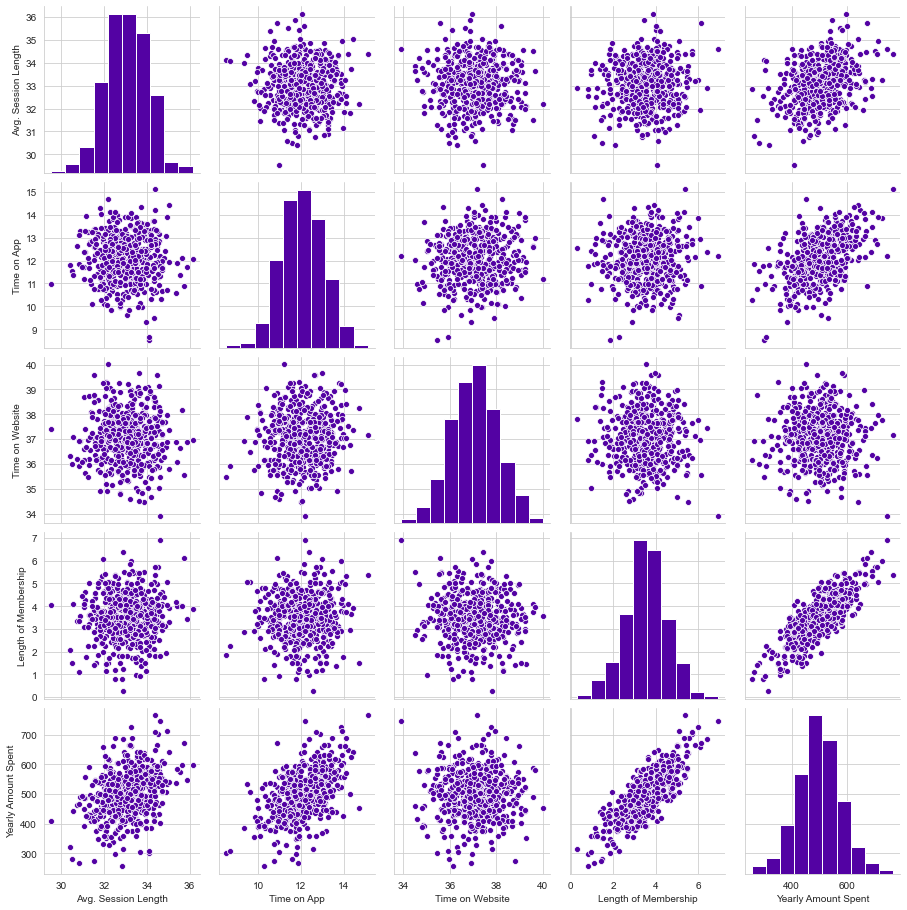

In [17]:
# Exploring the types of relationships across the entire data set using pairplot.
sns.pairplot(customers)

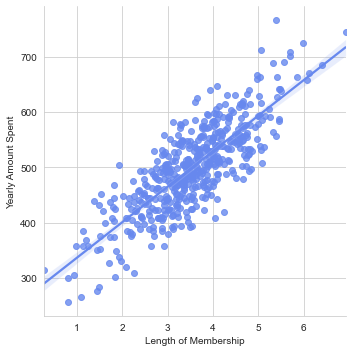

In [23]:
# Creating a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership. 
sns.set_palette("coolwarm")
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Training and Testing Data

Let's now begin to train out regression model! We will need to first split up our data into X and y, Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. 

In [24]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [25]:
# Use model_selection.train_test_split from sklearn to split the data into training and testing sets. 
from sklearn.model_selection import train_test_split

In [26]:
# Set test_size=0.3 and random_state=101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the model

In [27]:
# Import LinearRegression from sklearn.linear_model 
from sklearn.linear_model import LinearRegression

In [28]:
# Create an instance of a LinearRegression() model named lm.
lm = LinearRegression()

In [29]:
# fit lm on the training data
lm.fit(X_train,y_train)

LinearRegression()

In [30]:
# Print out the coefficients of the model
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data

In [32]:
# Use lm.predict() to predict off the X_test set of the data
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

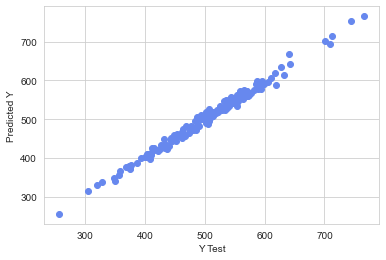

In [33]:
# Create a scatterplot of the real test values versus the predicted values. 
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

In [34]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430838
MSE: 79.81305165097461
RMSE: 8.933815066978642
